In [1]:
#Import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Pull in data from csv files
fan_data = pd.read_csv("2000_Fans_Combined_Final.csv")

#View that the data has been pulled in correctly
fan_data.head()

,Fans Capacity,Matches,Home Goals,Away Goals,Home Win (%),Draw (%),Away Win (%),Home Shots,Away Shots,Home SoT,Away SoT,Home Fouls,Away Fouls,Home Yellows,Away Yellows,Home Reds,Away Reds
0,Maximum Fans,2596,1.487,1.182,0.443,0.260,0.297,13.777,11.251,4.562,3.765,11.124,11.702,1.534,1.802,0.049,0.077
1,No Fans,539,1.334,1.217,0.404,0.249,0.347,12.067,11.020,4.141,3.620,12.345,11.892,1.464,1.419,0.067,0.069
2,Limited Fans,37,1.459,0.892,0.432,0.270,0.297,14.081,9.568,4.541,3.135,11.324,11.703,1.243,1.946,0.027,0.162


In [3]:
#Build a dataframe with the relevant columns - fans capacity and matches
df = pd.DataFrame(fan_data, columns=["Fans Capacity","Matches"])
df

,Fans Capacity,Matches
0,Maximum Fans,2596
1,No Fans,539
2,Limited Fans,37


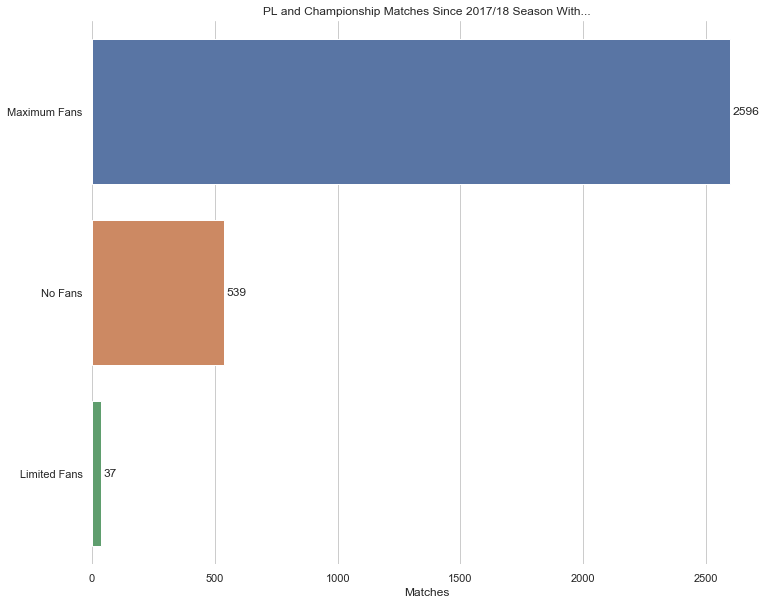

In [4]:
#Sort these teams by the number of matches
df = df.sort_values(by=["Matches"],ascending=False)

#Create the mapping for the bars
sns.set(style="whitegrid")
sns.set_color_codes()
f, ax = plt.subplots(figsize=(12, 10))

#Plot the barchart with the data
sns.barplot(x="Matches", y="Fans Capacity", data=df)

#Label the axis
ax.set(ylabel="",xlabel="Matches",title="PL and Championship Matches Since 2017/18 Season With...")

#Annotation of the numbers
for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 10,       
            p.get_y() + p.get_height() / 2,
            "{:1.0f}".format(width),
            ha = "left",
            va = "center")

#Show the barchart
sns.despine(left=True, bottom=True)

In [5]:
#Build a dataframe with the relevant columns - fans capacity,home wins, draws and away wins
df1 = pd.DataFrame(fan_data, columns=["Fans Capacity","Home Win (%)","Draw (%)","Away Win (%)"])
df1

,Fans Capacity,Home Win (%),Draw (%),Away Win (%)
0,Maximum Fans,0.443,0.260,0.297
1,No Fans,0.404,0.249,0.347
2,Limited Fans,0.432,0.270,0.297


In [6]:
#Build columns to covert decimal percentage numbers into whole percentages
df1["Home Win Percentage"] = df1["Home Win (%)"]*100
df1["Draw Percentage"] = df1["Draw (%)"]*100
df1["Away Win Percentage"] = df1["Away Win (%)"]*100
df1

,Fans Capacity,Home Win (%),Draw (%),Away Win (%),Home Win Percentage,Draw Percentage,Away Win Percentage
0,Maximum Fans,0.443,0.260,0.297,44.3,26.0,29.7
1,No Fans,0.404,0.249,0.347,40.4,24.9,34.7
2,Limited Fans,0.432,0.270,0.297,43.2,27.0,29.7


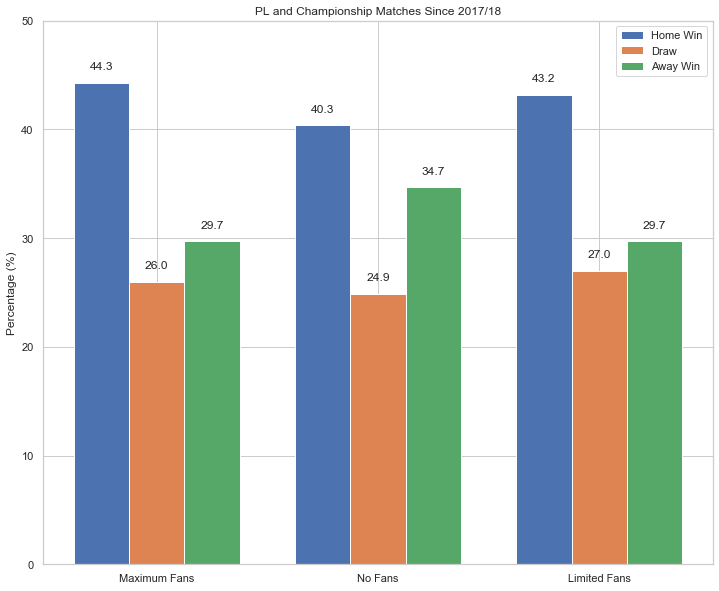

In [7]:
#Create the mapping for the bars
sns.set(style="whitegrid")
sns.set_color_codes()
f, ax = plt.subplots(figsize=(12, 10))
barWidth = 0.25

#Plot the barchart with the data series
bar1 = df1["Home Win Percentage"]
bar2 = df1["Draw Percentage"]
bar3 = df1["Away Win Percentage"]

r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bar1, width=barWidth, label='Home Win')
plt.bar(r2, bar2, width=barWidth, label='Draw')
plt.bar(r3, bar3, width=barWidth, label='Away Win')

#Label the axis 
plt.ylabel('Percentage (%)')
plt.xticks([r+ barWidth for r in range(len(bar1))],df1["Fans Capacity"])
plt.ylim((0, 50))
ax.set(title="PL and Championship Matches Since 2017/18")
rects = ax.patches

#Annotation of the numbers
labels = ["44.3","40.3","43.2","26.0","24.9","27.0","29.7","34.7","29.7"]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom')

#Show the barchart
plt.legend()
plt.show()

In [8]:
#Build a dataframe with the relevant columns - fans capacity,home goals and away goals
df2 = pd.DataFrame(fan_data, columns=["Fans Capacity","Home Goals","Away Goals"])
df2

,Fans Capacity,Home Goals,Away Goals
0,Maximum Fans,1.487,1.182
1,No Fans,1.334,1.217
2,Limited Fans,1.459,0.892


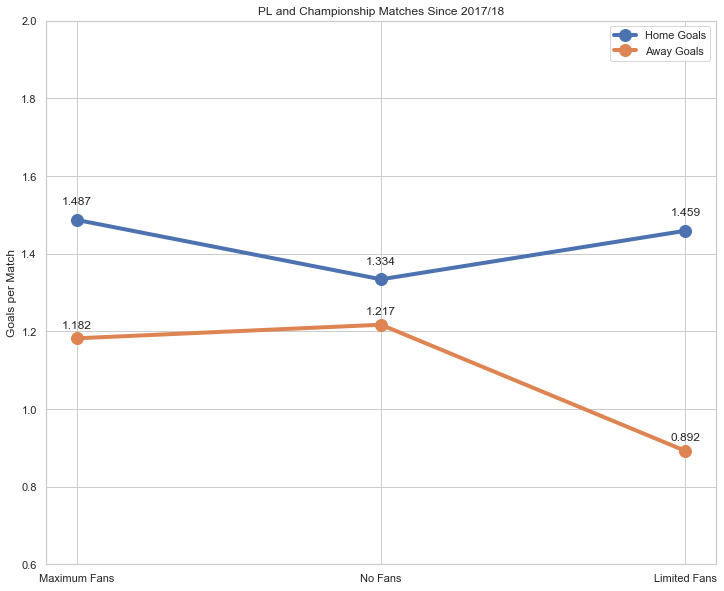

In [9]:
#Create the mapping for the lines
sns.set(style="whitegrid")
sns.set_color_codes()
f, ax = plt.subplots(figsize=(12, 10))

plt.ylim(0.6,2)
plt.xlim(-0.1,2.1)
plt.grid(True)

#Plot the data 
plt.plot(df2["Home Goals"], marker="o", linewidth=4, markersize=12, label='Home Goals')
plt.plot(df2["Away Goals"], marker="o", linewidth=4, markersize=12, label='Away Goals')

#Label the axis 
plt.ylabel('Goals per Match')
plt.xticks([0,1,2],["Maximum Fans","No Fans","Limited Fans"])
ax.set(title="PL and Championship Matches Since 2017/18")

#Annotation of the numbers
x1=[0,1,2]
y1=df2["Home Goals"]
y2=df2["Away Goals"]

for x,y in zip(x1,y1):

    label = "{:.3f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,15),
                 ha='center')

for x,y in zip(x1,y2):

    label = "{:.3f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

#Show the line graph
plt.legend()
plt.show()

In [10]:
#ADDITIONAL ANALYSIS
#Build a dataframe with the relevant columns - fans capacity,home goals, away goals, home shots, away shots
df4 = pd.DataFrame(fan_data, columns=["Fans Capacity","Home Goals","Away Goals","Home Shots","Away Shots"])
df4

,Fans Capacity,Home Goals,Away Goals,Home Shots,Away Shots
0,Maximum Fans,1.487,1.182,13.777,11.251
1,No Fans,1.334,1.217,12.067,11.020
2,Limited Fans,1.459,0.892,14.081,9.568


In [11]:
#Build columns to covert goal and shot numbers into conversion rate
df4["Home Conversion Rate"] = (df4["Home Goals"]/df4["Home Shots"])*100
df4["Away Conversion Rate"] = (df4["Away Goals"]/df4["Away Shots"])*100
df4

,Fans Capacity,Home Goals,Away Goals,Home Shots,Away Shots,Home Conversion Rate,Away Conversion Rate
0,Maximum Fans,1.487,1.182,13.777,11.251,10.793351,10.505733
1,No Fans,1.334,1.217,12.067,11.020,11.054943,11.043557
2,Limited Fans,1.459,0.892,14.081,9.568,10.361480,9.322742


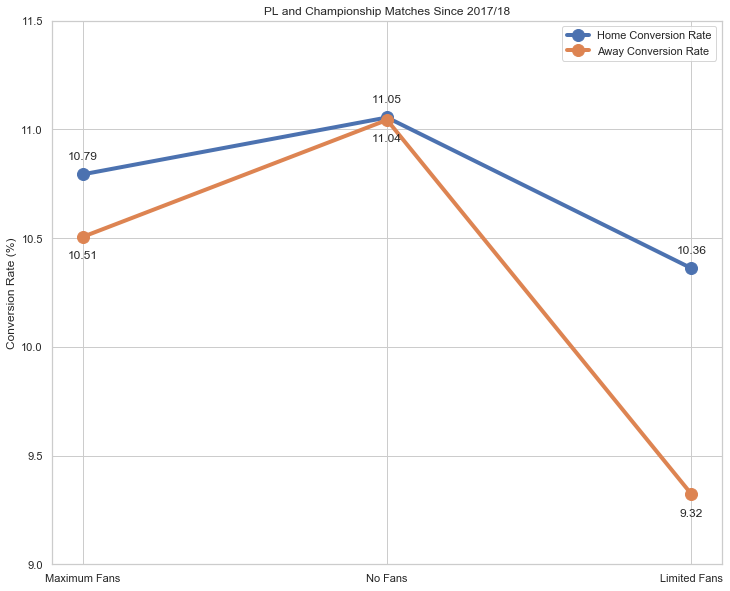

In [12]:
#Same plotting technique as goals
sns.set(style="whitegrid")
sns.set_color_codes()
f, ax = plt.subplots(figsize=(12, 10))

plt.ylim(9,11.5)
plt.xlim(-0.1,2.1)
plt.grid(True)

plt.plot(df4["Home Conversion Rate"], marker="o", linewidth=4, markersize=12, label='Home Conversion Rate')
plt.plot(df4["Away Conversion Rate"], marker="o", linewidth=4, markersize=12, label='Away Conversion Rate')

plt.ylabel('Conversion Rate (%)')
plt.xticks([0,1,2],["Maximum Fans","No Fans","Limited Fans"])
ax.set(title="PL and Championship Matches Since 2017/18")

x1=[0,1,2]
y1=df4["Home Conversion Rate"]
y2=df4["Away Conversion Rate"]

for x,y in zip(x1,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

for x,y in zip(x1,y2):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-22), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.legend()
plt.show()